In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.layers import Dense, Dropout,Activation,DFlatten,Conv2D,MaxPooling2D

In [ ]:
(train_images,train_labels),(test_images,test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


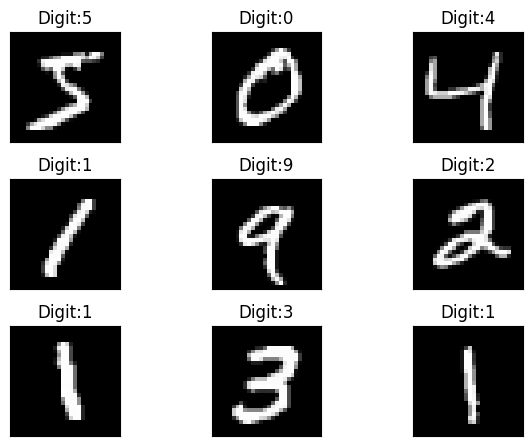

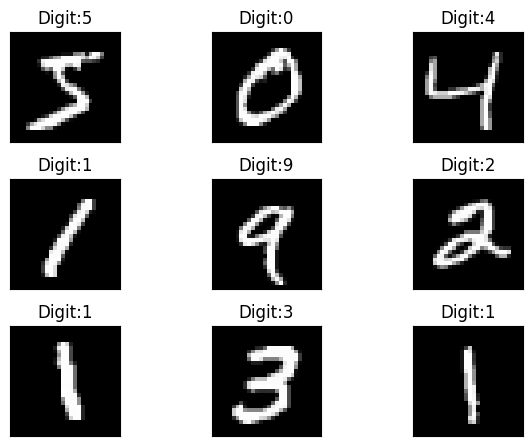

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title("Digit:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.shape[0]

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1429 - accuracy: 0.9558 - val_loss: 0.0439 - val_accuracy: 0.9851
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0335 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0316 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0311 - val_accuracy: 0.9897
Epoch 5/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0340 - val_accuracy: 0.9906


In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'test accuracy : {test_acc}')

313/313 [==============================] - 3s 11ms/step - loss: 0.0340 - accuracy: 0.9906
test accuracy : 0.9905999898910522


In [ ]:
test_loss,test_acc = model.evaluate(train_images,train_labels)
print(f'train accuracy : {test_acc}')

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0146 - accuracy: 0.9954
train accuracy : 0.9954166412353516


In [ ]:
import numpy as np

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
len(predictions)

10000

In [ ]:
predictions


array([[3.7380357e-07, 4.6787814e-06, 1.7222332e-05, ..., 9.9988121e-01,
        6.7835044e-06, 5.4770076e-06],
       [1.0726991e-06, 6.9598190e-07, 9.9999815e-01, ..., 4.3337253e-10,
        1.4704359e-08, 1.6870144e-12],
       [1.1884538e-06, 9.9969971e-01, 6.4577534e-07, ..., 6.3035682e-06,
        6.1991386e-06, 4.4953440e-06],
       ...,
       [1.8957904e-12, 1.2036316e-09, 4.1987616e-10, ..., 1.2495609e-09,
        6.7779354e-08, 4.9527773e-07],
       [3.6594946e-12, 1.8233919e-12, 1.2897987e-12, ..., 1.4184418e-10,
        2.1547428e-05, 1.5304519e-10],
       [9.1532762e-08, 9.7681085e-10, 8.6992571e-07, ..., 2.7703225e-11,
        6.4271390e-08, 1.9877155e-11]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
def predict_image(image_index):
  pred_label = np.argmax(predictions[image_index])
  true_label = test_labels[image_index]
  plt.figure()
  plt.imshow(test_images[image_index].reshape(28,28),cmap=plt.cm.binary)
  plt.title(f"Predicted: {pred_label} ,True Label: {true_label}")
  plt.axis("off")
  plt.show()

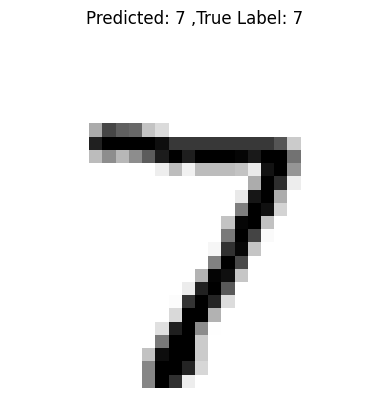

In [ ]:
predict_image(0)